In [1]:
import os
from io import BytesIO
import time
import zipfile
import numpy as np
import boto3
from tqdm import tqdm
from datetime import datetime, timezone
from time import gmtime, strftime
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys
import networkx as nx
import itertools
import warnings

# Read Results from Apps

In [19]:
app_list = ['App'+str(i) for i in range(1,7)]

In [20]:
results = {}
for app in app_list:
    with open('../'+app+'/results.json', 'r') as f:
        results[app] = json.load(f)

# Number of Iterations

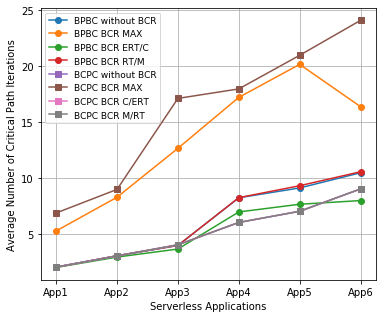

In [21]:
fig=plt.figure(figsize=(6,5))
ax=plt.subplot(111)
ax.grid()
ax.plot(app_list, [results[app]['BPBC_BCR_disabled_Iterations'] for app in app_list], marker='o', label='BPBC without BCR')
ax.plot(app_list, [results[app]['BPBC_BCR_MAX_Iterations'] for app in app_list], marker='o', label='BPBC BCR MAX') 
ax.plot(app_list, [results[app]['BPBC_BCR_ERT/C_Iterations'] for app in app_list], marker='o', label='BPBC BCR ERT/C')
ax.plot(app_list, [results[app]['BPBC_BCR_RT/M_Iterations'] for app in app_list], marker='o', label='BPBC BCR RT/M') 
ax.plot(app_list, [results[app]['BCPC_BCR_disabled_Iterations'] for app in app_list], marker='s', label='BCPC without BCR')
ax.plot(app_list, [results[app]['BCPC_BCR_MAX_Iterations'] for app in app_list], marker='s', label='BCPC BCR MAX') 
ax.plot(app_list, [results[app]['BCPC_BCR_C/ERT_Iterations'] for app in app_list], marker='s', label='BCPC BCR C/ERT')
ax.plot(app_list, [results[app]['BCPC_BCR_M/RT_Iterations'] for app in app_list], marker='s', label='BCPC BCR M/RT') 
ax.legend(prop={'size': 9})
ax.set_xlabel('Serverless Applications')
ax.set_ylabel('Average Number of Critical Path Iterations')
fig.savefig('Iterations', dpi=300)
fig.savefig('Iterations.pdf')